In [1]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

from scripts.ddqn_agent import DDQNAgent
from scripts.reinforce_agent import ReinforceMCwithoutBaselineAgent, ReinforceMCwithBaselineAgent
from scripts.training import Trainer, trainingInspector, test_agent, plot_test_results, compute_decay

## Hyperparameters

In [2]:
def episode_trigger(x):
    if x % 200 == 0:
        return True
    return False

In [3]:
reinforce_type1_hyperparameter_list = [
    # Best performing hyperparameters
    {
        "num_episodes": 2000,
        "max_return": -60,
        "LR_POLICY": 1e-3,
    }    
]

reinforce_type2_hyperparameter_list = [
    # Best performing hyperparameters
    {
        "num_episodes": 2000,
        "max_return": -60,
        "LR_POLICY": 5e-4,
        "LR_VALUE": 5e-4*1,
        "UPDATE_EVERY": 50
    }    
]


## Running Experiments REINFORCE

In [ ]:
env = gym.make('Acrobot-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/acrobot-reinforce-type1-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
reinforce_type1_agent = ReinforceMCwithoutBaselineAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    device = device,
    seed=0
)

trainer = Trainer()
reinforce_type1_results = test_agent(env, reinforce_type1_agent, trainer, reinforce_type1_hyperparameter_list, num_experiments=5)

env.close()

with open("backups/acrobot-plots/acrobot_reinforce_type1_results.pickle", 'wb') as handle:
    pickle.dump(reinforce_type1_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
env = gym.make('Acrobot-v1', render_mode="rgb_array")
env = RecordVideo(
    env,
    video_folder="backups/acrobot-reinforce-type2-visualizations",
    name_prefix="eval",
    episode_trigger=episode_trigger
)

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
reinforce_type2_agent = ReinforceMCwithBaselineAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    device = device,
    seed=0
)

trainer = Trainer()
reinforce_type2_results = test_agent(env, reinforce_type2_agent, trainer, reinforce_type2_hyperparameter_list, num_experiments=5)

env.close()

with open("backups/acrobot-plots/acrobot_reinforce_type2_results.pickle", 'wb') as handle:
    pickle.dump(reinforce_type2_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

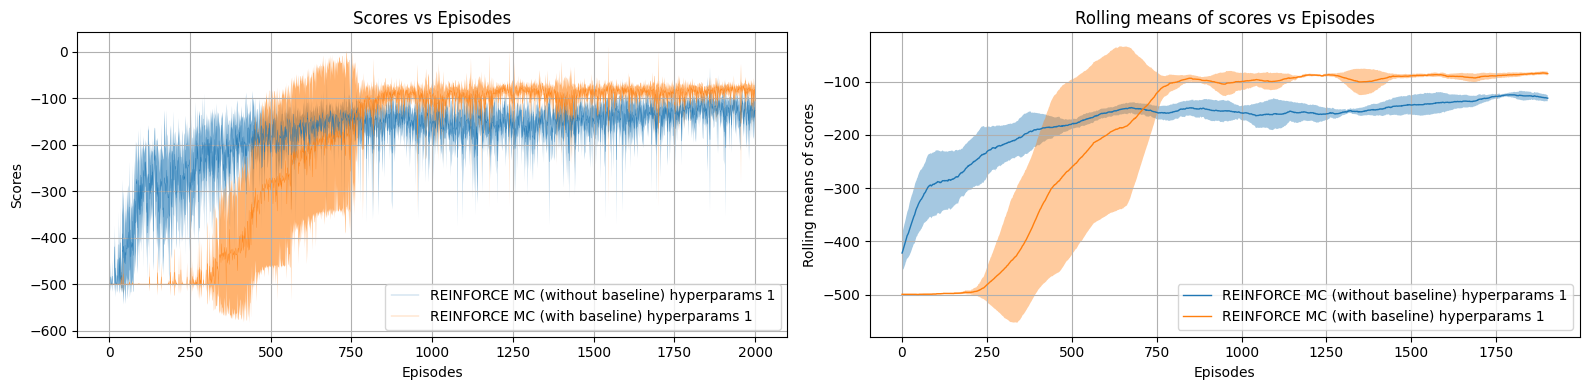

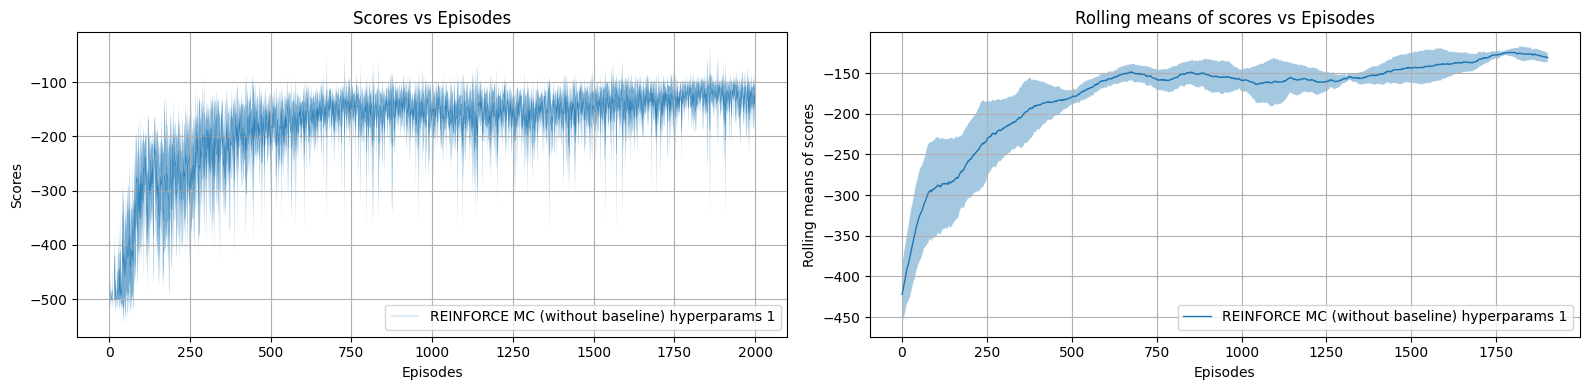

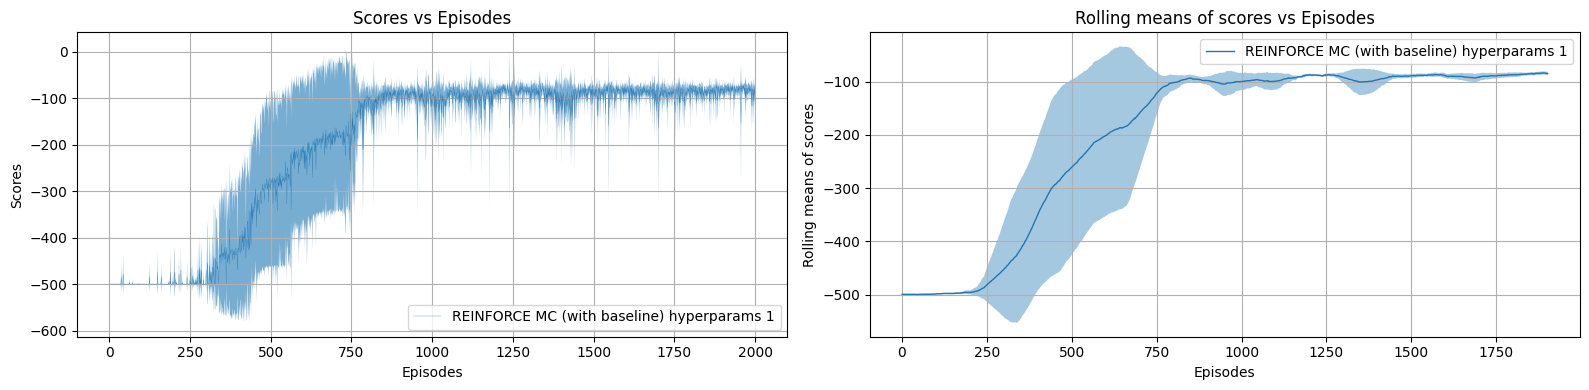

In [4]:
combined_results = reinforce_type1_results + reinforce_type2_results

plot_test_results(combined_results, [0, 1])
plt.savefig("backups/acrobot-plots/acrobot_reinforce_combined.png")
plot_test_results(reinforce_type1_results, [0])
plt.savefig("backups/acrobot-plots/acrobot_reinforce_type1.png")
plot_test_results(reinforce_type2_results, [0])
plt.savefig("backups/acrobot-plots/acrobot_reinforce_type2.png")